# Atividade Prática II - Treinamento e Validação de Modelos de RL

**Aluno:** João Paulo Poffo

**Disciplina:** Reinforcement Learning - Turma II

**Data:** 21/08/2021



Neste trabalho vamos aplicar `Gym`, `Stable-Baselines3` e `RL Baselines Zoo` para lidar com o treinamento e validação de problemas de aprendizado por reforço. Sua tarefa é:

1. Selecionar um cenário da biblioteca `Gym` de sua preferência, desde que este cenário também seja contemplado pelos modelos disponibilizados na `rl baselines zoo`;
2. Selecionar três algoritmos das biblioteca `Stable-baselines3` para resolver esse problema. Pesquise na documentação da biblioteca quais são os algoritmos mais adequados para o ambiente escolhido e justifique a sua escolha. 
3. Realize o treinamento de cada um dos três modelos ---você pode ajustar os parâmetros do modelos, se achar necessário--- e salve os modelos em disco.
4. De posse dos modelos treinados e salvos, carregue-os e avalie-os por 10 episódios. Apresente os resultados médios e gere a curva de recompensa acumulada disponibilizada pelo `TensorBoard`.
5. Compare os resultados dos modelos treinados com os resultados obtidos por modelo(s) existentes no `RL Baselines Zoo` para o cenário escolhido.
6. Gere um vídeo do melhor modelo que você treinou e do modelo escolhido na `RL Baselines Zoo`. Verifique a documentação de cada biblioteca sobre a criação do vídeo e visualização em Notebooks.



* **Data de entrega:** 04/09/2021
* **Local de envio:** AVA.
* **Tipo de documento:** Notebook (`.ipynb`).



1. Preparação do ambiente

In [1]:
# Precisa instalar o swig pra windows pra funcionar o box2d-py (necessário para o atari - http://swig.org/Doc4.0/Windows.html#Windows)
# Obs: Não adianta copiar o exe para o bin. Tem que adicionar a pasta do swig no path
!pip install cmake

!pip install gym[all]

!pip install atari-py

!pip install matplotlib

  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
    Running setup.py install for mujoco-py: started
    Running setup.py install for mujoco-py: finished with status 'error'

  ERROR: Command errored out with exit status 1:
   command: 'E:\temp\rl_exe1\venv\Scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\joao.poffo\\AppData\\Local\\Temp\\pip-install-x3nxt3g4\\mujoco-py_8be4b0fc76e045b6b0ab2ff8713ac50f\\setup.py'"'"'; __file__='"'"'C:\\Users\\joao.poffo\\AppData\\Local\\Temp\\pip-install-x3nxt3g4\\mujoco-py_8be4b0fc76e045b6b0ab2ff8713ac50f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\joao.poffo\AppData\Local\Temp\pip-wheel-p8mypnhp'
       cwd: C:\Users\joao.poffo\AppData\Local\Temp\pip-install-x3nxt3g4\mujoco-py_8be4b0fc76e045b6b0ab2ff8713ac50f\
  Complete output (54 lines):
  running bdist_wheel
  running build
  
  You appear to be missing MuJoCo.  We expe


    File "e:\apps\python37\lib\distutils\dist.py", line 985, in run_command
      cmd_obj.run()
    File "C:\Users\joao.poffo\AppData\Local\Temp\pip-install-x3nxt3g4\mujoco-py_8be4b0fc76e045b6b0ab2ff8713ac50f\setup.py", line 28, in run
      import mujoco_py  # noqa: force build
    File "C:\Users\joao.poffo\AppData\Local\Temp\pip-install-x3nxt3g4\mujoco-py_8be4b0fc76e045b6b0ab2ff8713ac50f\mujoco_py\__init__.py", line 3, in <module>
      from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException
    File "C:\Users\joao.poffo\AppData\Local\Temp\pip-install-x3nxt3g4\mujoco-py_8be4b0fc76e045b6b0ab2ff8713ac50f\mujoco_py\builder.py", line 502, in <module>
      mjpro_path, key_path = discover_mujoco()
    File "C:\Users\joao.poffo\AppData\Local\Temp\pip-install-x3nxt3g4\mujoco-py_8be4b0fc76e045b6b0ab2ff8713ac50f\mujoco_py\utils.py", line 93, in discover_mujoco
      raise Exception(message)
  Exception:
  You appear to be missing MuJoCo.  We expected to find th

2. Baixando os Roms do Atari para teste

In [2]:
#Instala o pacote para fazer downloads em Python
!pip install wget
import wget
import os

# Só baixa a primeira vez (Se baixar, tem que descompactar)
if not os.path.isdir('Roms'):

  #função auxiliar p/ apresentar a barra de progresso de download
  def bar_progress(current, total, width=80):
    progress_message = 'Baixando: %d%% (%d / %d) bytes' % (current / total * 100, current, total)
    print(progress_message, end='\r')

  #baixa o arquivo com as ROMS a partir da url
  wget.download('http://www.atarimania.com/roms/Roms.rar', out='Roms.rar', bar=bar_progress)

  #wget.download('https://github.com/openai/atari-py/archive/refs/heads/master.zip', out='atari-py.zip', bar=bar_progress)

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=fb8a5fe418e99f113c5e7fbbe19306e860b7e6bd9f5c9b73b4d1baca0a01b40f
  Stored in directory: c:\users\joao.poffo\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


3. Importa as Roms

In [6]:
!python -m atari_py.import_roms 'Roms/ROMS/'

4. Testando o ambiente com o cenário selecionado (SpaceInvaders)

In [25]:
# Função para salvar a animação como gif (daqui: https://gist.github.com/botforge/64cbb71780e6208172bbf03cd9293553)

from matplotlib import animation
import matplotlib.pyplot as plt

def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)

MovieWriter imagemagick unavailable; using Pillow instead.


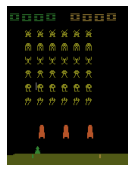

In [24]:
#importa a biblioteca gym
import gym
import time

scenario = 'SpaceInvaders-v4'
env = gym.make(scenario)
frames = []

observation = env.reset()
#define a quantidade de passos de tempo
for _ in range(1000):
  #desenha a visualização do ambiente  
  #env.render()
  rgb_observation = env.render(mode = 'rgb_array') 
  frames.append(rgb_observation)
  
  #toma uma ação de forma aleatória
  action = env.action_space.sample()
  #observa o ambiente com a base na ação executada
  observation, reward, done, info = env.step(action)
  #adiciona um atraso na execução para melhorar a visualização
  
  #time.sleep(0.03)

  #verifica se o agente completou a tarefa
  if done:
    #reinicia a simulação
    observation = env.reset()
#fecha a visualização
env.close()

save_frames_as_gif(frames, 'images/', f'{scenario}-sample.gif')

![Exemplo do jogo Space Invaders](images/SpaceInvaders-v4-sample.gif)

De acordo com a documentação do stable baselines 3, o space invaders possui os algoritmos A2C, PPO, DQN e QT-DQN.

Selecionei A2C, PPO e DQN pois são contemplados também no zoo.

In [12]:
# Treina e salva os modelos

%%time

from stable_baselines3 import PPO, A2C, DQN

PPO('MlpPolicy', scenario).learn(10000).save(f'models/{scenario}-PPO')

A2C('MlpPolicy', scenario).learn(10000).save(f'models/{scenario}-A2C')

# Precisei diminuir o Buffer (1M para 50k) pra caber na memória da minha máquina
DQN('MlpPolicy', scenario, optimize_memory_usage=True, buffer_size=50000).learn(10000).save(f'models/{scenario}-DQN')

Wall time: 28.1 s


MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


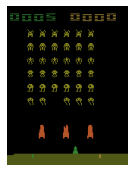

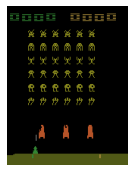

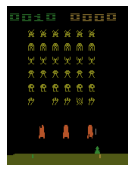

In [31]:
# Carrega e avalia por 100 (10 pareceu mto pouco) episódios (PPO)
def evaluate(algo_class, episodes=100):
  env = gym.make(scenario)

  algo_name = algo_class.__name__
  trained_model = algo_class.load(f"models/{scenario}-{algo_name}", verbose=1)
  env = gym.make(scenario)

  frames = []
  obs = env.reset()
  for i in range(episodes):
      action, _states = trained_model.predict(obs, deterministic=True)
      obs, reward, done, info = env.step(action)
      
      # Para ver na tela
      #env.render()

      rgb_observation = env.render(mode = 'rgb_array') 
      frames.append(rgb_observation)

      if done:
        obs = env.reset()

  env.close()

  save_frames_as_gif(frames, 'images/', f'{scenario}-{algo_name}.gif')

evaluate(PPO)
evaluate(A2C)
evaluate(DQN)

![Avaliação por 10 episódios do treino com PPO](images/SpaceInvaders-v4-PPO.gif)
![Avaliação por 10 episódios do treino com A2C](images/SpaceInvaders-v4-A2C.gif)
![Avaliação por 10 episódios do treino com DQN](images/SpaceInvaders-v4-DQN.gif)

In [28]:
# Baixando o código do Stable Baselines3
if not os.path.isdir('rl-baselines3-zoo'):
    !git clone https://github.com/DLR-RM/rl-baselines3-zoo.git

#Necessário para o baselines stables se rodar local (Mas optei por usar containers)
#!pip install -r ./requirements.txt

# Seta diretório raiz no baselines3 para os treinos
%cd rl-baselines3-zoo

e:\temp\rl_exe1\rl-baselines3-zoo


In [32]:
def run_script(algo, eval_freq=10000, eval_episodes=10, eval_envs=1):
    # Não funcionou chamando o script do repo... pq no windows não respeita comandos bash por algum motivo. Fallback pro que o script faz com o docker.
    #!./scripts/run_docker_cpu.sh python train.py --algo a2c --env SpaceInvaders-v4
    !docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "cd /root/code/rl_zoo/ && python train.py --algo {algo} --env SpaceInvaders-v4 --tensorboard-log=tensorboard-logs --eval-freq {eval_freq} --eval-episodes {eval_episodes} --n-eval-envs {eval_envs}"

run_script("a2c", eval_freq=500)

^C


In [33]:
# Treinando PPO
#!docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "cd /root/code/rl_zoo/ && python train.py --algo ppo --env SpaceInvaders-v4"
run_script("ppo")

In [ ]:
# Treinando DQN
#!docker run -t --rm --network host --ipc=host --mount src="%cd%",target=/root/code/rl_zoo,type=bind stablebaselines/rl-baselines3-zoo-cpu:latest bash -c "cd /root/code/rl_zoo/ && python train.py --algo dqn --env SpaceInvaders-v4"
run_script("dqn")
